In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [127]:
default_path = 'C:\\Users\\Developer\\Desktop\\AMD Radeon RX 6700 XT\\'
performance_logs = pd.DataFrame()
setting_values = os.listdir(default_path)
    
for setting_value in setting_values:
    file_path = os.path.join(default_path, setting_value)
    file_names = os.listdir(file_path)
    fps_dataframes: list[pd.DataFrame] = []
    hardware_dataframes: list[pd.DataFrame] = []
    
    for file_name in file_names:
        if file_name.startswith('FPS') and file_name.endswith('.CSV'):
            dataframe = pd.read_csv(os.path.join(file_path, file_name))
            fps_dataframes.append(dataframe)
        elif file_name.startswith('Hardware') and file_name.endswith('.CSV'):
            dataframe = pd.read_csv(os.path.join(file_path, file_name))
            hardware_dataframes.append(dataframe)
        else:
            continue

    fps_dataframe, hardware_dataframe = pd.concat(fps_dataframes), pd.concat(hardware_dataframes)
    dataframe = pd.merge(fps_dataframe, hardware_dataframe, how='inner', on='TIME STAMP')
    dataframe.loc[:, 'SETTING VALUE'] = setting_value
    filtered_dataframe = dataframe.loc[dataframe['FPS'] <= 120]
    performance_logs = pd.concat([performance_logs, filtered_dataframe], ignore_index=True)

In [128]:
performance_logs

,TIME STAMP,PROCESS,GRAPHICS API,FPS,AVG FRAME TIME,99th% FPS,MICRO STUTTER,HEAVY STUTTER RATE,FRAME GEN LAG,GPU UTIL,...,GPU MCLK,CPU UTIL,CPU FREQUENCY,CPU VOLTAGE,CPU TEMPERATURE,CPU POWER,CPU EDC,CPU TDC,SYSTEM MEM UTIL,SETTING VALUE
0,2025-02-07 17:59:42.801,ffxiv_dx11.exe,DX11,88.935,11.244,21.987,18.182,3.024,NaN,99.0,...,1988.0,42.84,3.269,1.322,46.963,39.390,69.134,30.033,9.94,1100
1,2025-02-07 17:59:43.309,ffxiv_dx11.exe,DX11,88.935,11.244,21.987,18.182,3.024,NaN,99.0,...,1990.0,42.39,3.192,1.323,46.716,39.763,70.135,30.485,10.00,1100
2,2025-02-07 17:59:43.807,ffxiv_dx11.exe,DX11,84.921,11.776,71.249,0.000,5.858,NaN,98.0,...,1988.0,42.53,2.861,1.323,46.574,38.051,66.464,29.144,10.03,1100
3,2025-02-07 17:59:44.304,ffxiv_dx11.exe,DX11,84.921,11.776,71.249,0.000,5.858,NaN,99.0,...,1988.0,41.16,2.951,1.325,46.881,37.146,69.863,28.463,10.03,1100
4,2025-02-07 17:59:44.810,ffxiv_dx11.exe,DX11,84.956,11.771,70.057,0.000,8.796,NaN,98.0,...,1988.0,42.61,2.876,1.321,46.337,36.855,65.855,28.256,10.02,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677986,2025-02-05 23:11:49.183,ffxiv_dx11.exe,DX11,97.935,10.211,91.896,0.000,0.000,NaN,99.0,...,1988.0,38.29,3.150,1.336,49.646,45.064,66.923,34.205,13.21,1130
677987,2025-02-05 23:11:49.680,ffxiv_dx11.exe,DX11,102.742,9.733,93.214,0.000,0.000,NaN,99.0,...,1990.0,39.13,3.099,1.335,49.356,43.167,66.985,32.676,13.20,1130
677988,2025-02-05 23:11:50.179,ffxiv_dx11.exe,DX11,103.733,9.640,93.021,0.000,0.000,NaN,99.0,...,1988.0,38.07,2.890,1.334,49.247,42.353,65.304,32.285,13.20,1130
677989,2025-02-05 23:11:50.677,ffxiv_dx11.exe,DX11,103.556,9.657,90.165,0.000,0.000,NaN,96.0,...,1988.0,38.51,2.926,1.331,48.964,40.951,63.924,31.193,13.21,1130


In [129]:
performance_logs.dtypes

TIME STAMP             object
PROCESS                object
GRAPHICS API           object
FPS                   float64
AVG FRAME TIME        float64
99th% FPS             float64
MICRO STUTTER         float64
HEAVY STUTTER RATE    float64
FRAME GEN LAG         float64
GPU UTIL              float64
GPU SCLK              float64
GPU PWR               float64
GPU TEMP              float64
GPU HOTSPOT TEMP      float64
GPU FAN               float64
GPU VOLTAGE           float64
GPU MEM UTIL          float64
GPU MCLK              float64
CPU UTIL              float64
CPU FREQUENCY         float64
CPU VOLTAGE           float64
CPU TEMPERATURE       float64
CPU POWER             float64
CPU EDC               float64
CPU TDC               float64
SYSTEM MEM UTIL       float64
SETTING VALUE          object
dtype: object

In [130]:
performance_logs.loc[:, performance_logs.columns[3:16]].drop(columns='FRAME GEN LAG').describe()

,FPS,AVG FRAME TIME,99th% FPS,MICRO STUTTER,HEAVY STUTTER RATE,GPU UTIL,GPU SCLK,GPU PWR,GPU TEMP,GPU HOTSPOT TEMP,GPU FAN,GPU VOLTAGE
count,677991.000000,677991.000000,677991.000000,677902.000000,676630.000000,677991.000000,677991.000000,677991.000000,677991.000000,677991.000000,677991.000000,677991.000000
mean,102.060982,10.635277,91.110472,0.113062,0.638564,94.994820,2482.286241,152.818753,73.021179,84.895715,916.152427,1119.525548
std,16.606251,6.334241,15.896744,1.448348,3.243228,11.140082,272.449903,18.091051,5.328865,6.270759,137.930176,63.322718
min,13.221000,8.327000,1.301000,0.000000,0.000000,0.000000,0.000000,5.000000,39.000000,39.000000,0.000000,0.000000
25%,94.695000,8.823000,85.135000,0.000000,0.000000,97.000000,2529.000000,149.000000,73.000000,84.000000,840.000000,1125.000000
50%,104.349000,9.583000,93.176000,0.000000,0.000000,98.000000,2539.000000,155.000000,75.000000,87.000000,900.000000,1131.000000
75%,113.345000,10.560000,100.761000,0.000000,0.129000,98.000000,2547.000000,161.000000,76.000000,88.000000,990.000000,1143.000000
max,120.000000,75.639000,118.646000,100.000000,50.000000,99.000000,2605.000000,203.000000,79.000000,95.000000,1621.000000,1156.000000


In [131]:
sns.set_style('whitegrid')

In [132]:
fps_describe = pd.concat([performance_logs[performance_logs['SETTING VALUE'] == setting_value]['FPS'].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]).drop(['count', 'min', 'max']) for setting_value in setting_values], axis=1)
fps_describe.columns = setting_values

In [133]:
melted_fps_describe = fps_describe.reset_index().melt(id_vars='index', var_name='SETTING VALUE', value_name='FPS')
melted_fps_describe

,index,SETTING VALUE,FPS
0,mean,1100,105.771777
1,std,1100,13.446427
2,1%,1100,49.861520
3,25%,1100,99.332000
4,50%,1100,107.763000
5,75%,1100,114.987000
6,99%,1100,119.997000
7,mean,1105,99.194837
8,std,1105,18.093523
9,1%,1105,18.420000


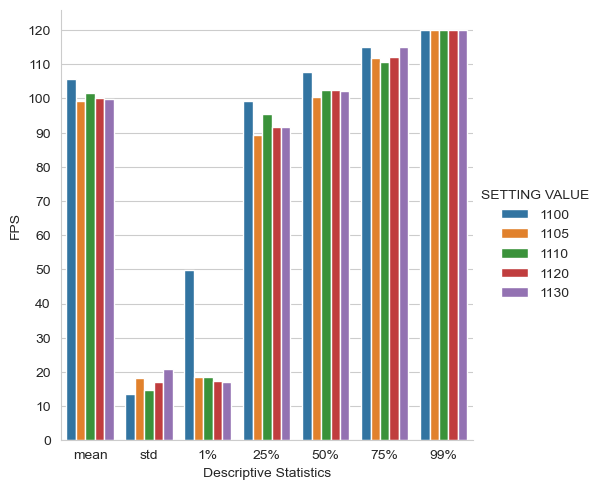

In [134]:
fps_describe_g = sns.catplot(
    data=melted_fps_describe, 
    kind='bar', 
    x='index',
    y='FPS',
    hue='SETTING VALUE',
)
fps_describe_g.set_axis_labels('Descriptive Statistics')
fps_describe_g.ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

In [135]:
fps99_describe = pd.concat([performance_logs[performance_logs['SETTING VALUE'] == setting_value]['99th% FPS'].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]).drop(['count', 'min', 'max']) for setting_value in setting_values], axis=1)
fps99_describe.columns = setting_values

In [136]:
melted_fps99_describe = fps99_describe.reset_index().melt(id_vars='index', var_name='SETTING VALUE', value_name='99th% FPS')

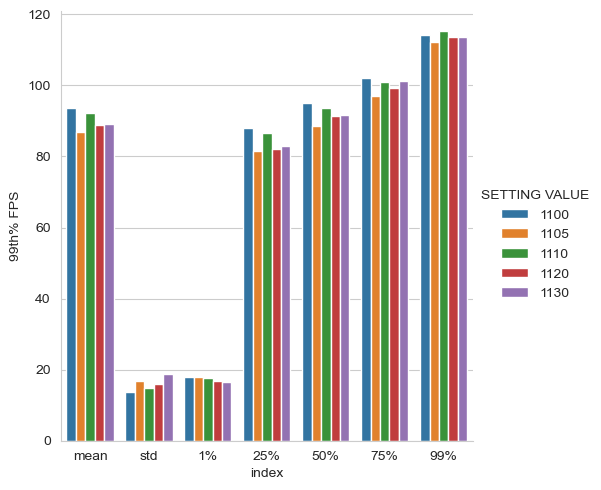

In [137]:
fps99_describe_g = sns.catplot(
    data=melted_fps99_describe, 
    kind='bar', 
    x='index',
    y='99th% FPS',
    hue='SETTING VALUE',
)
fps_describe_g.set_axis_labels('Descriptive Statistics')
fps_describe_g.ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

In [138]:
power_describe = pd.concat([performance_logs[performance_logs['SETTING VALUE'] == setting_value]['GPU PWR'].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]).drop(['count', 'min', 'max']) for setting_value in setting_values], axis=1)
power_describe.columns = setting_values

In [139]:
melted_power_describe = power_describe.reset_index().melt(id_vars='index', var_name='SETTING VALUE', value_name='GPU PWR')

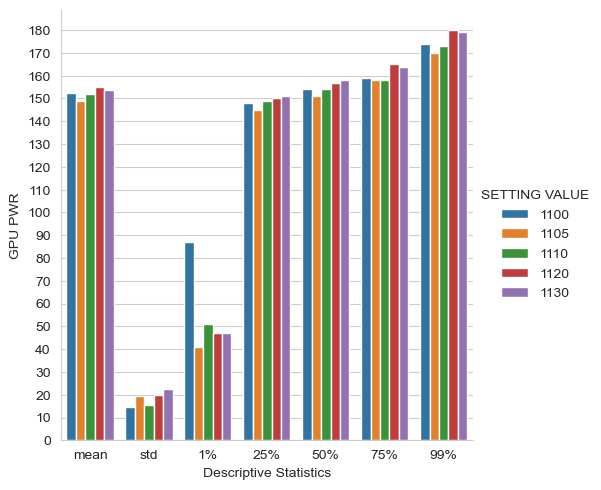

In [140]:
power_describe_g = sns.catplot(
    data=melted_power_describe, 
    kind='bar', 
    x='index',
    y='GPU PWR',
    hue='SETTING VALUE',
)
power_describe_g.set_axis_labels('Descriptive Statistics')
power_describe_g.ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

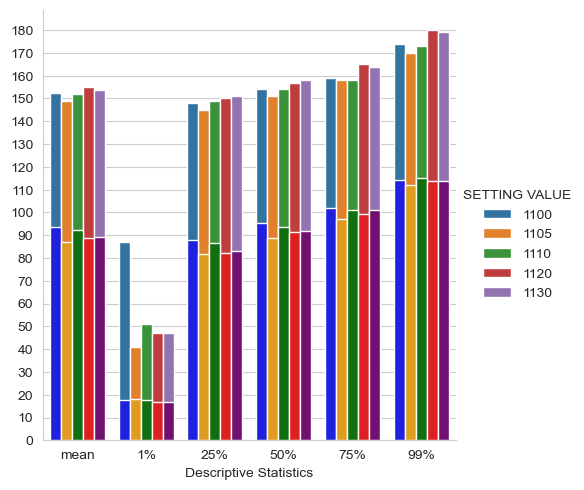

In [141]:
power_describe_g = sns.catplot(
    data=melted_power_describe[melted_power_describe['index'] != 'std'], 
    kind='bar', 
    x='index',
    y='GPU PWR',
    hue='SETTING VALUE',
)

power_describe_ax = power_describe_g.ax
power_describe_g.set_axis_labels('Descriptive Statistics')
power_describe_ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

sns.barplot(
    data=melted_fps99_describe[melted_fps99_describe['index'] != 'std'], 
    x='index',
    y='99th% FPS',
    hue='SETTING VALUE',
    palette={
        '1100': 'blue',
        '1105': 'orange',
        '1110': 'green',
        '1120': 'red',
        '1130': 'purple',
    },
    ax=power_describe_ax,
)

if power_describe_ax.get_legend() is not None:
    power_describe_ax.get_legend().remove()

power_describe_ax.set_ylabel(None)
plt.show()

In [142]:
temp_describe = pd.concat([performance_logs[performance_logs['SETTING VALUE'] == setting_value]['GPU TEMP'].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]).drop(['count', 'min', 'max']) for setting_value in setting_values], axis=1)
temp_describe.columns = setting_values

In [143]:
melted_temp_describe = power_describe.reset_index().melt(id_vars='index', var_name='SETTING VALUE', value_name='GPU TEMP')

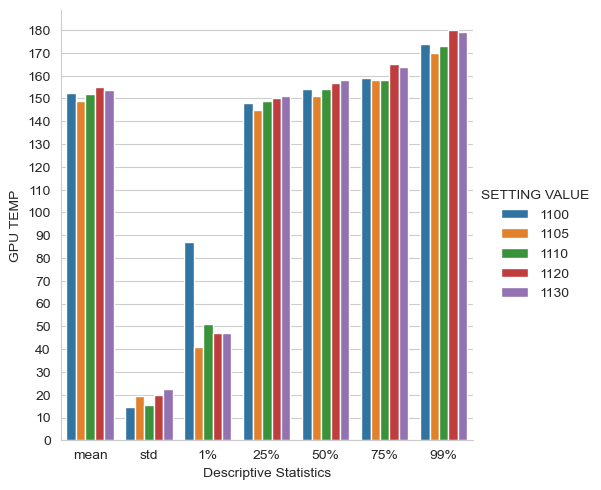

In [144]:
temp_describe_g = sns.catplot(
    data=melted_temp_describe, 
    kind='bar', 
    x='index',
    y='GPU TEMP',
    hue='SETTING VALUE',
)
temp_describe_g.set_axis_labels('Descriptive Statistics')
temp_describe_g.ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

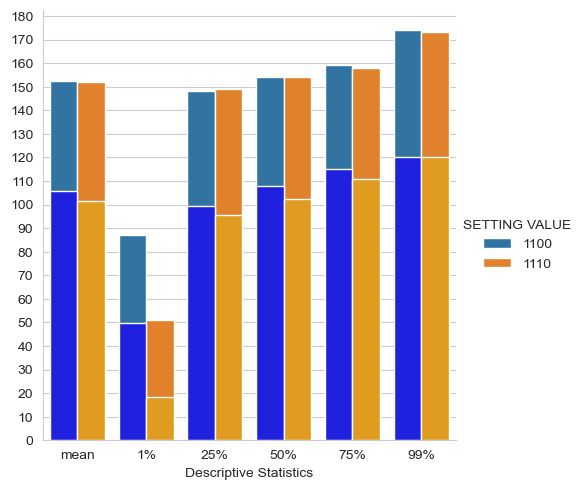

In [145]:
power_describe_g = sns.catplot(
    data=melted_power_describe[(melted_power_describe['index'] != 'std') & ((melted_power_describe['SETTING VALUE'] == '1100') | (melted_power_describe['SETTING VALUE'] == '1110'))], 
    kind='bar', 
    x='index',
    y='GPU PWR',
    hue='SETTING VALUE',
)

power_describe_ax = power_describe_g.ax
power_describe_g.set_axis_labels('Descriptive Statistics')
power_describe_ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

sns.barplot(
    data=melted_fps_describe[(melted_fps_describe['index'] != 'std') & ((melted_fps_describe['SETTING VALUE'] == '1100') | (melted_fps_describe['SETTING VALUE'] == '1110'))], 
    x='index',
    y='FPS',
    hue='SETTING VALUE',
    palette={
        '1100': 'blue',
        '1110': 'orange',
    },
    ax=power_describe_ax,
)

if power_describe_ax.get_legend() is not None:
    power_describe_ax.get_legend().remove()

power_describe_ax.set_ylabel(None)
plt.show()

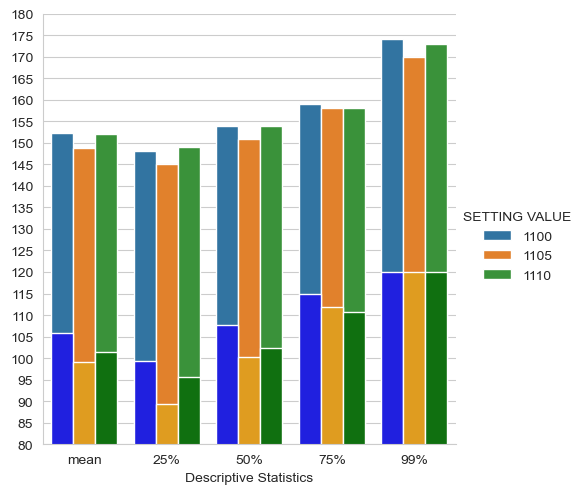

In [146]:
power_describe_g = sns.catplot(
    data=melted_power_describe[(~melted_power_describe['index'].isin(['std', '1%'])) & (melted_power_describe['SETTING VALUE'].isin(['1100', '1105', '1110']))], 
    kind='bar', 
    x='index',
    y='GPU PWR',
    hue='SETTING VALUE',
)

power_describe_ax = power_describe_g.ax
power_describe_g.set_axis_labels('Descriptive Statistics')
power_describe_ax.set_ylim(80, 180)
power_describe_ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

sns.barplot(
    data=melted_fps_describe[(~melted_fps_describe['index'].isin(['std', '1%'])) & (melted_fps_describe['SETTING VALUE'].isin(['1100', '1105', '1110']))], 
    x='index',
    y='FPS',
    hue='SETTING VALUE',
    palette={
        '1100': 'blue',
        '1105': 'orange',
        '1110': 'green',
    },
    ax=power_describe_ax,
)

if power_describe_ax.get_legend() is not None:
    power_describe_ax.get_legend().remove()

power_describe_ax.set_ylabel(None)
plt.show()

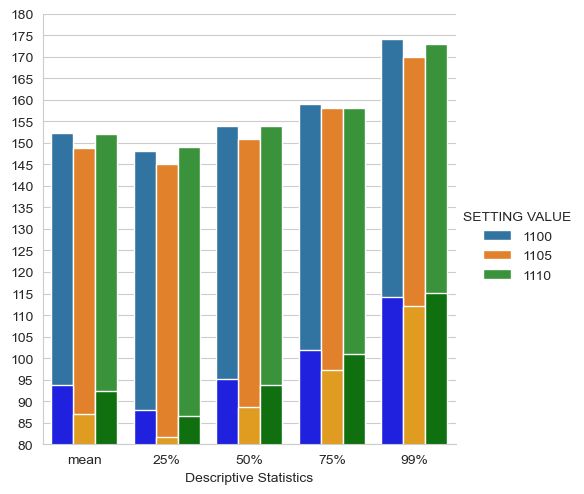

In [147]:
power_describe_g = sns.catplot(
    data=melted_power_describe[(~melted_power_describe['index'].isin(['std', '1%'])) & (melted_power_describe['SETTING VALUE'].isin(['1100', '1105', '1110']))], 
    kind='bar', 
    x='index',
    y='GPU PWR',
    hue='SETTING VALUE',
)

power_describe_ax = power_describe_g.ax
power_describe_g.set_axis_labels('Descriptive Statistics')
power_describe_ax.set_ylim(80, 180)
power_describe_ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

sns.barplot(
    data=melted_fps99_describe[(~melted_fps99_describe['index'].isin(['std', '1%'])) & (melted_fps99_describe['SETTING VALUE'].isin(['1100', '1105', '1110']))], 
    x='index',
    y='99th% FPS',
    hue='SETTING VALUE',
    palette={
        '1100': 'blue',
        '1105': 'orange',
        '1110': 'green',
    },
    ax=power_describe_ax,
)

if power_describe_ax.get_legend() is not None:
    power_describe_ax.get_legend().remove()

power_describe_ax.set_ylabel(None)
plt.show()